In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Dataset-thesis/newsdata504266with7labels.csv')
df

,Unnamed: 0,body,label,source,title,text
0,0,ঢাকাচট্টগ্রাম মহাসড়কের সীতাকুন্ড উপজেলার ভাটিয়...,national,https://www.banglanews24.com/national/news/bd/...,"চট্টগ্রামে দুর্ঘটনায় গার্মেন্টস কর্মী নিহত, আহ...",ঢাকাচট্টগ্রাম মহাসড়কের সীতাকুন্ড উপজেলার ভাটিয়...
1,1,নীলফামারী সদর উপজেলার টুপামারী ইউনিয়নের কামারপ...,national,https://www.banglanews24.com/national/news/bd/...,নীলফামারীতে স্ত্রীকে পিটিয়ে হত্যার ঘটনায় মামলা,নীলফামারী সদর উপজেলার টুপামারী ইউনিয়নের কামারপ...
2,2,সিরিজের একমাত্র টেস্টে আগামীকাল মুখোমুখি হবে ব...,sports,https://www.jagonews24.com/special-reports/new...,উইকেট দেখে হতাশ টাইগার শিবির,সিরিজের একমাত্র টেস্টে আগামীকাল মুখোমুখি বাংলা...
3,3,অনলাইন ডেস্ক পাকিস্তানের বেলুচিস্তান প্রদেশের ...,international,https://www.dailyjanakantha.com/details/articl...,\nপাকিস্তানের কোয়েটায় পুলিশ ট্রেনিং কলেজে সন্ত...,অনলাইন ডেস্ক পাকিস্তানের বেলুচিস্তান প্রদেশের ...
4,4,ফিলিস্তিনের পশ্চিমতীরে ইসরায়েলী পুলিশের সঙ্গে ...,international,https://www.jagonews24.com/special-reports/new...,"পশ্চিমতীরে সংঘর্ষে নিহত ১, আহত দুই শতাধিক",ফিলিস্তিনের পশ্চিমতীরে ইসরায়েলী পুলিশের সংঘর্ষ...
...,...,...,...,...,...,...
504261,504261,মাধুর ভান্ডাকারের সমালোচিত ছবি হিরোইনএর জুনিয়র...,entertainment,https://www.banglanews24.com/national/news/bd/...,নৃশংস হত্যার শিকার ‘হিরোইন’ ছবির অভিনেত্রী মিন...,মাধুর ভান্ডাকারের সমালোচিত ছবি হিরোইনএর জুনিয়র...
504262,504262,ছয় মাসের প্রস্তুতিতে এসএ গেমস খেলতে নেপালে এসে...,sports,https://www.dailyinqilab.com/article/252218/,খো খো’র ছেলেদের রৌপ্য,ছয় মাসের প্রস্তুতিতে এসএ গেমস খেলতে নেপালে এসে...
504263,504263,গেল বছরের শেষে দহন সিনেমা দিয়ে দর্শক মাতিয়েছেন...,entertainment,https://www.jagonews24.com/special-reports/new...,কলকাতার দুই নায়কের সঙ্গে ট্রেলারেই পূজার চমক,বছরের শেষে দহন সিনেমা দিয়ে দর্শক মাতিয়েছেন পূজ...
504264,504264,করোনায় আক্রান্ত শেষ রোগী সুস্থ হয়ে হাসপাতাল ছা...,international,https://www.jagonews24.com/special-reports/new...,"করোনামুক্ত হলো ফিজি, মারা যাননি একজনও",করোনায় আক্রান্ত শেষ রোগী সুস্থ হয়ে হাসপাতাল ছা...


In [ ]:
df1 = df.drop(columns=['Unnamed: 0'])
df1.head()

,body,label,source,title,text
0,ঢাকাচট্টগ্রাম মহাসড়কের সীতাকুন্ড উপজেলার ভাটিয়...,national,https://www.banglanews24.com/national/news/bd/...,"চট্টগ্রামে দুর্ঘটনায় গার্মেন্টস কর্মী নিহত, আহ...",ঢাকাচট্টগ্রাম মহাসড়কের সীতাকুন্ড উপজেলার ভাটিয়...
1,নীলফামারী সদর উপজেলার টুপামারী ইউনিয়নের কামারপ...,national,https://www.banglanews24.com/national/news/bd/...,নীলফামারীতে স্ত্রীকে পিটিয়ে হত্যার ঘটনায় মামলা,নীলফামারী সদর উপজেলার টুপামারী ইউনিয়নের কামারপ...
2,সিরিজের একমাত্র টেস্টে আগামীকাল মুখোমুখি হবে ব...,sports,https://www.jagonews24.com/special-reports/new...,উইকেট দেখে হতাশ টাইগার শিবির,সিরিজের একমাত্র টেস্টে আগামীকাল মুখোমুখি বাংলা...
3,অনলাইন ডেস্ক পাকিস্তানের বেলুচিস্তান প্রদেশের ...,international,https://www.dailyjanakantha.com/details/articl...,\nপাকিস্তানের কোয়েটায় পুলিশ ট্রেনিং কলেজে সন্ত...,অনলাইন ডেস্ক পাকিস্তানের বেলুচিস্তান প্রদেশের ...
4,ফিলিস্তিনের পশ্চিমতীরে ইসরায়েলী পুলিশের সঙ্গে ...,international,https://www.jagonews24.com/special-reports/new...,"পশ্চিমতীরে সংঘর্ষে নিহত ১, আহত দুই শতাধিক",ফিলিস্তিনের পশ্চিমতীরে ইসরায়েলী পুলিশের সংঘর্ষ...


In [ ]:
df1.isna().sum()
df2 = df1.dropna()
df2.isna().sum()

body      0
label     0
source    0
title     0
text      0
dtype: int64

In [ ]:
df1.shape

(504266, 5)

In [ ]:
max_length=df1["text"].str.len().max()
print(max_length)
min_length=df1["text"].str.len().min()
min_length

4743


326

In [ ]:
df1.drop(df1[df1['text'].str.len() > 5000].index, inplace = True)
df1.drop(df1[df1['text'].str.len() < 490].index, inplace = True)

In [ ]:
max_length=df1["text"].str.len().max()
print(max_length)
min_length=df1["text"].str.len().min()
min_length

4743


490

In [ ]:
df2 = df1.reset_index(drop=True)

In [ ]:
# Look at classification type counts
counts = df2.label.value_counts()
print(len(counts))
print(counts)

7
sports                86243
international         83946
national              83939
all_bangladesh        80840
politics              65799
entertainment         52969
economics-business    46884
Name: label, dtype: int64


In [ ]:
# Get classification types where counts are over 1000
#types = np.asarray(counts[(counts > 1000)].index)
types=['sports'
,'international'
,'national'
,'all_bangladesh'
,'politics'
,'entertainment'
,'economics-business'
]
# Filter dataset's records for classification types > 1000
data = df2[df2.label.isin(types)]

#data_m = data[(data['classification'] =='HYDROLASE' )  (data['classification'] =='LIGASE' ) or (data['classification'] =='TRANSFERASE' ) or (data['classification'] =='OXIDOREDUCTASE' ) or (data['classification'] =='ISOMERASE' ) or (data['classification'] =='LYASE' )]

print(types)
print(len(types))
print('%d is the number of records in the final filtered dataset' %data.shape[0])

['sports', 'international', 'national', 'all_bangladesh', 'politics', 'entertainment', 'economics-business']
7
500620 is the number of records in the final filtered dataset


In [ ]:
train=data
a=train.label.unique()
l=len(train.label.unique())
print(a)
print(len(a))

['national' 'sports' 'international' 'all_bangladesh' 'politics'
 'economics-business' 'entertainment']
7


In [ ]:
for i in range (l):
    train.label = train.label.replace(a[i], i)

In [ ]:
train1 = train
train2 = train1[['text','label']]
train2

,text,label
0,ঢাকাচট্টগ্রাম মহাসড়কের সীতাকুন্ড উপজেলার ভাটিয়...,0
1,নীলফামারী সদর উপজেলার টুপামারী ইউনিয়নের কামারপ...,0
2,সিরিজের একমাত্র টেস্টে আগামীকাল মুখোমুখি বাংলা...,1
3,অনলাইন ডেস্ক পাকিস্তানের বেলুচিস্তান প্রদেশের ...,2
4,ফিলিস্তিনের পশ্চিমতীরে ইসরায়েলী পুলিশের সংঘর্ষ...,2
...,...,...
500615,মাধুর ভান্ডাকারের সমালোচিত ছবি হিরোইনএর জুনিয়র...,6
500616,ছয় মাসের প্রস্তুতিতে এসএ গেমস খেলতে নেপালে এসে...,1
500617,বছরের শেষে দহন সিনেমা দিয়ে দর্শক মাতিয়েছেন পূজ...,6
500618,করোনায় আক্রান্ত শেষ রোগী সুস্থ হয়ে হাসপাতাল ছা...,2


In [ ]:
# Look at classification type counts
counts = df2.label.value_counts()
print(len(counts))
print(counts)

7
sports                86243
international         83946
national              83939
all_bangladesh        80840
politics              65799
entertainment         52969
economics-business    46884
Name: label, dtype: int64


In [ ]:
train2.label.value_counts()

1    86243
2    83946
0    83939
3    80840
4    65799
6    52969
5    46884
Name: label, dtype: int64

In [ ]:
train3 = train2
train3.label = train3.label.astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.layers import SpatialDropout1D
from keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import GlobalMaxPool1D
from keras.utils import plot_model
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Input
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Concatenate
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
from sklearn.feature_selection import RFE
import tensorflow as tf
import re

In [ ]:
train3

,text,label
0,ঢাকাচট্টগ্রাম মহাসড়কের সীতাকুন্ড উপজেলার ভাটিয়...,0
1,নীলফামারী সদর উপজেলার টুপামারী ইউনিয়নের কামারপ...,0
2,সিরিজের একমাত্র টেস্টে আগামীকাল মুখোমুখি বাংলা...,1
3,অনলাইন ডেস্ক পাকিস্তানের বেলুচিস্তান প্রদেশের ...,2
4,ফিলিস্তিনের পশ্চিমতীরে ইসরায়েলী পুলিশের সংঘর্ষ...,2
...,...,...
500615,মাধুর ভান্ডাকারের সমালোচিত ছবি হিরোইনএর জুনিয়র...,6
500616,ছয় মাসের প্রস্তুতিতে এসএ গেমস খেলতে নেপালে এসে...,1
500617,বছরের শেষে দহন সিনেমা দিয়ে দর্শক মাতিয়েছেন পূজ...,6
500618,করোনায় আক্রান্ত শেষ রোগী সুস্থ হয়ে হাসপাতাল ছা...,2


In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~।', lower=False)
tokenizer.fit_on_texts(train3.text.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 1111239 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(train3.text.values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (500620, 250)


In [ ]:
Y = pd.get_dummies(train3.label).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (500620, 7)


In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size=.10)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 100)          5000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 250, 32)           9632      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 125, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 7)                 707       
Total params: 5,063,539
Trainable params: 5,063,539
Non-trainable params: 0
_________________________________________________________________
None


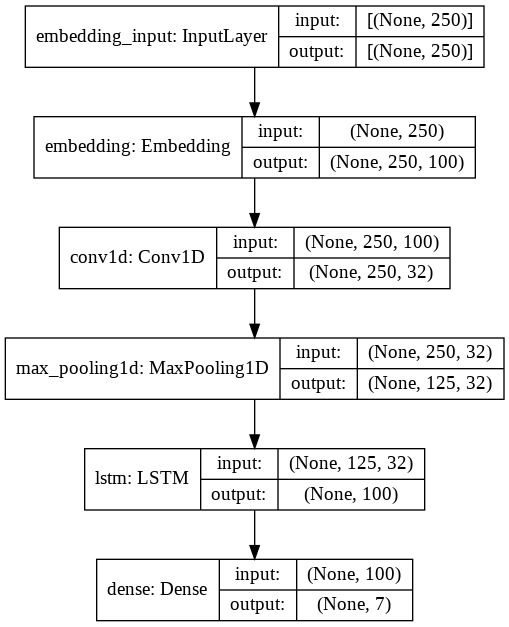

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH ))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(l, activation='softmax'))

# compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# summarize
print(model.summary())
plot_model(model, show_shapes=True, to_file='multichannel.png')

In [ ]:
epochs = 10
batch_size = 128

In [ ]:
history = model.fit(train_features, train_labels, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
3168/3168 [==============================] - 1302s 410ms/step - loss: 0.1560 - accuracy: 0.7599 - val_loss: 0.0505 - val_accuracy: 0.9348
Epoch 2/10
3168/3168 [==============================] - 1299s 410ms/step - loss: 0.0416 - accuracy: 0.9470 - val_loss: 0.0472 - val_accuracy: 0.9395
Epoch 3/10
3168/3168 [==============================] - 1406s 444ms/step - loss: 0.0316 - accuracy: 0.9604 - val_loss: 0.0487 - val_accuracy: 0.9377
Epoch 4/10
3168/3168 [==============================] - 1388s 438ms/step - loss: 0.0240 - accuracy: 0.9709 - val_loss: 0.0527 - val_accuracy: 0.9363
Epoch 5/10
3168/3168 [==============================] - 1383s 437ms/step - loss: 0.0170 - accuracy: 0.9803 - val_loss: 0.0597 - val_accuracy: 0.9343


In [ ]:
accr = model.evaluate(test_features,test_labels)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1565/1565 [==============================] - 52s 33ms/step - loss: 0.0609 - accuracy: 0.9326
Test set
  Loss: 0.061
  Accuracy: 0.933


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from keras.models import load_model

MODEL_PATH = '/content/gdrive/My Drive/Dataset-thesis/cnn_classification.h5'

# Now save model in drive
model.save(MODEL_PATH)


In [ ]:
# !ls /content/gdrive/My Drive

ls: cannot access '/content/gdrive/My': No such file or directory
ls: cannot access 'Drive': No such file or directory


In [ ]:
# Load Model
# model = load_model(MODEL_PATH)
# model.save('cnn_classification.h5')

In [ ]:
from keras.models import load_model
new_model = load_model('cnn_classification.h5')

In [ ]:
# prediction = model.predict(X_test)

In [ ]:
new_complaint = ["মন্ত্রী এসময় করোনায় আক্রান্ত বিএনপি নেত্রী খালেদা জিয়ার আরোগ্য কামনা করে বলেন, আমরা মহান স্রষ্টার কাছে প্রার্থনা করি, তিনি দ্রুত সুস্থ হোন। প্রধানমন্ত্রী শেখ হাসিনা তার শারীরিক অবস্থা ও মানবিক বিবেচনায় আদালতে তার জামিন না হওয়া সংবিধানে প্রদত্ত প্রশাসনিক ক্ষমতা বলে তাকে মুক্তি দিয়ে সেটি দুই দফা বর্ধিত করেছেন, তার সুবিধা অনুযায়ী তিনি চিকিৎসা গ্রহণ করছেন"]
seq =tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = new_model.predict(padded)
print([pred])

[array([[5.7356351e-06, 1.7200771e-06, 2.2061691e-05, 4.9452901e-06,
        9.9995840e-01, 4.1778567e-06, 2.9580804e-06]], dtype=float32)]


In [ ]:
predicted_labels = pred.argmax(axis=1)
predicted_labels
print(predicted_labels)
if predicted_labels == 0:
  print("national")
elif predicted_labels == 1:
  print("sports")
elif predicted_labels == 2:
  print("international")
elif predicted_labels == 3:
  print("all_bangladesh")
elif predicted_labels == 4:
  print("politics")
elif predicted_labels == 5:
  print("economics-business")
elif predicted_labels == 6:
  print("entertainment")
else:
  print("wrong predition")

[4]
politics


In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 100)          5000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 250, 32)           9632      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 125, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 7)                 707       
Total params: 5,063,539
Trainable params: 5,063,539
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# new_model.get_weights()

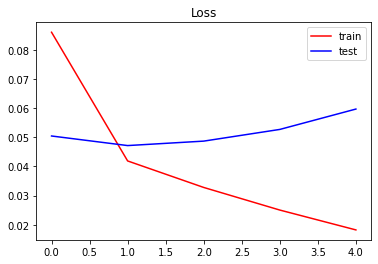

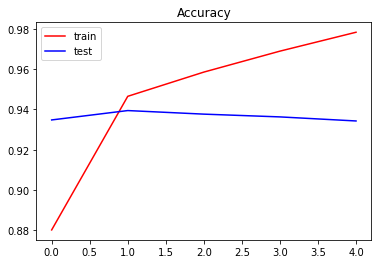

In [ ]:
from matplotlib import pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'],'r', label='train')
plt.plot(history.history['val_loss'],'b', label='test')
plt.legend()
plt.show()
plt.title('Accuracy')
plt.plot(history.history['accuracy'],'r', label='train')
plt.plot(history.history['val_accuracy'],'b', label='test')
plt.legend()
plt.show()

In [ ]:
predicted_classes = model.predict(test_features)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [ ]:
predicted_classes.shape, test_labels.shape
print(test_labels.shape)

(50062, 7)


In [ ]:
test_Y = np.argmax(np.round(test_labels),axis=1)

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(7)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.88      0.87      0.87      8426
     Class 1       0.99      0.98      0.99      8599
     Class 2       0.97      0.96      0.97      8488
     Class 3       0.95      0.96      0.95      7952
     Class 4       0.87      0.87      0.87      6559
     Class 5       0.89      0.91      0.90      4676
     Class 6       0.95      0.96      0.96      5362

    accuracy                           0.93     50062
   macro avg       0.93      0.93      0.93     50062
weighted avg       0.93      0.93      0.93     50062



In [ ]:
name=[]
for i in range(7):
  name.append(i)

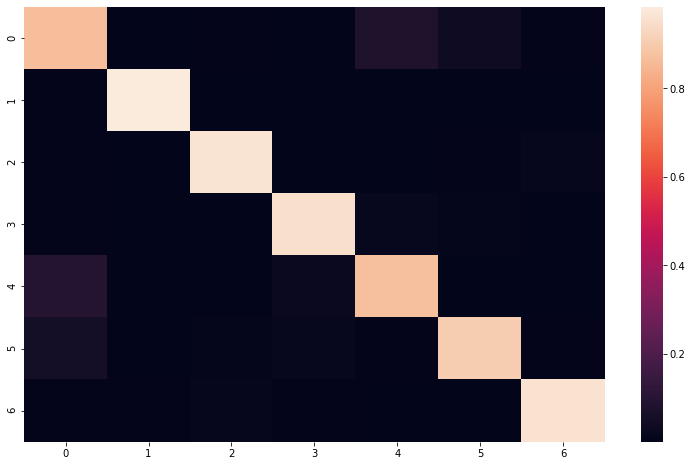

In [ ]:
# Plot confusion matrix
conf_mat = confusion_matrix(test_Y, predicted_classes, labels = name)

#Normalize confusion_matrix
conf_mat = conf_mat.astype('float')/ conf_mat.sum(axis=1)[:, np.newaxis]

# Plot Heat Map
fig , ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.heatmap(conf_mat)

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[7294   14   63   20  663  320   52]
 [  38 8466   31   21    9    5   29]
 [  53   32 8188   34   13   64  104]
 [  48   15   27 7615  130   84   33]
 [ 621    3    3  192 5709   24    7]
 [ 241    5   48   86   27 4242   27]
 [  40   27   83   36   11   23 5142]]
Normalized confusion matrix
[[8.66e-01 1.66e-03 7.48e-03 2.37e-03 7.87e-02 3.80e-02 6.17e-03]
 [4.42e-03 9.85e-01 3.61e-03 2.44e-03 1.05e-03 5.81e-04 3.37e-03]
 [6.24e-03 3.77e-03 9.65e-01 4.01e-03 1.53e-03 7.54e-03 1.23e-02]
 [6.04e-03 1.89e-03 3.40e-03 9.58e-01 1.63e-02 1.06e-02 4.15e-03]
 [9.47e-02 4.57e-04 4.57e-04 2.93e-02 8.70e-01 3.66e-03 1.07e-03]
 [5.15e-02 1.07e-03 1.03e-02 1.84e-02 5.77e-03 9.07e-01 5.77e-03]
 [7.46e-03 5.04e-03 1.55e-02 6.71e-03 2.05e-03 4.29e-03 9.59e-01]]


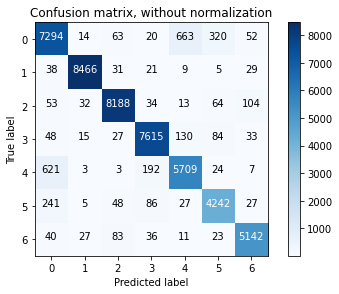

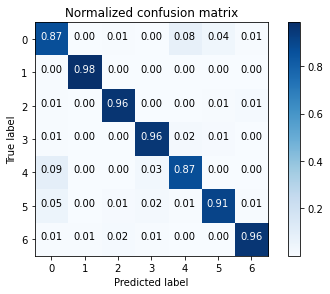

In [ ]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


class_names = name

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_Y, predicted_classes)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()